In [3]:
import numpy as np
import matplotlib.pyplot as plt
import miepython as mp

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl 
mpl.rcParams["xtick.direction"] = "in"
mpl.rcParams["ytick.direction"] = "in"
mpl.rcParams["lines.markeredgecolor"] = "k"
mpl.rcParams["lines.markeredgewidth"] = 1
mpl.rcParams["figure.dpi"] = 200
from matplotlib import rc
rc('font', family='serif')
rc('text', usetex=True)
rc('xtick', labelsize='medium')
rc('ytick', labelsize='medium')
def cm2inch(value):
    return value/2.54

In [5]:
link = r"https://refractiveindex.info/tmp/data/organic/(C8H8)n%20-%20polystyren/Zhang.txt"
poly = np.genfromtxt(link, delimiter='\t')

In [6]:
N = len(poly)//2
poly_lam = poly[1:N,0][:40]
poly_mre = poly[1:N,1][:40]
poly_mim = poly[N+1:,1][:40]

In [7]:
poly_mim

array([8.13e-07, 7.28e-07, 6.82e-07, 6.70e-07, 6.50e-07, 6.33e-07,
       6.12e-07, 6.02e-07, 6.09e-07, 6.25e-07, 6.11e-07, 6.12e-07,
       5.72e-07, 5.62e-07, 5.70e-07, 5.78e-07, 6.07e-07, 5.86e-07,
       5.95e-07, 5.83e-07, 6.36e-07, 6.31e-07, 5.93e-07, 6.14e-07,
       6.27e-07, 5.83e-07, 5.86e-07, 5.73e-07, 5.64e-07, 5.82e-07,
       5.64e-07, 6.02e-07, 5.55e-07, 5.76e-07, 5.67e-07, 5.51e-07,
       5.98e-07, 6.08e-07, 5.46e-07, 5.45e-07])

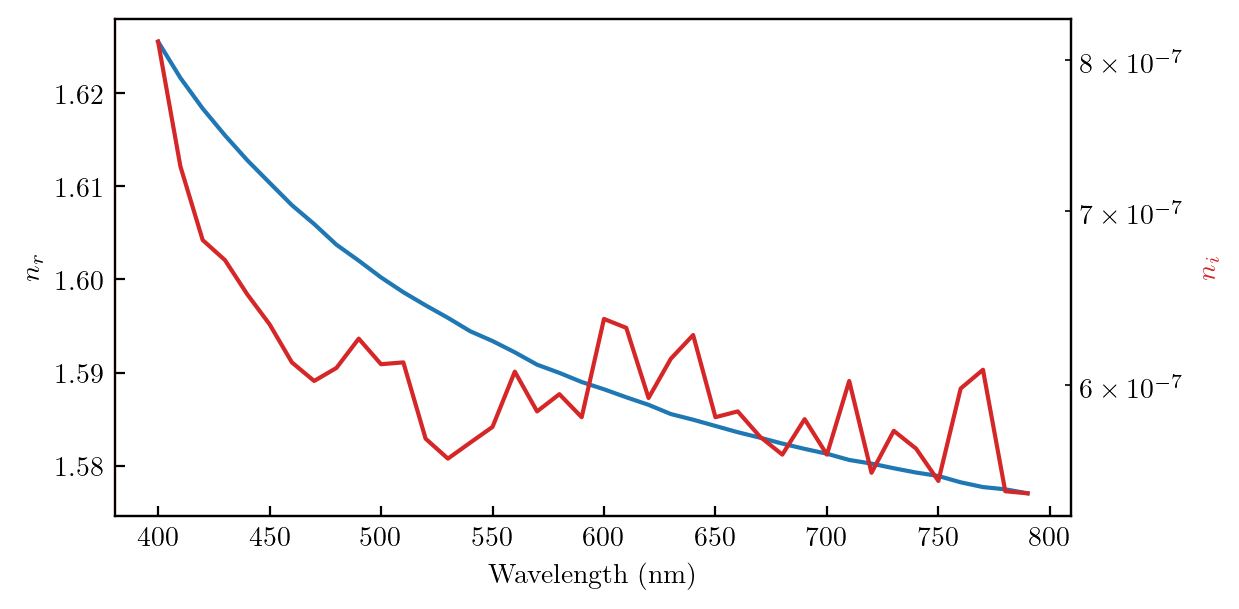

In [8]:
plt.figure(figsize=( cm2inch(16),cm2inch(8)))

plt.plot(poly_lam*1000,poly_mre,color='tab:blue')

#plt.xlim(300,800)
#plt.ylim(-,3)

plt.xlabel('Wavelength (nm)')
plt.ylabel('$n_r$')
#plt.text(350, 1.2, '$m_{re}$', color='blue', fontsize=14)
#plt.text(350, 2.2, '$m_{im}$', color='red', fontsize=14)
ax=plt.gca()

ax.spines['left'].set_color("red")

ax2=ax.twinx()
plt.semilogy(poly_lam*1000,poly_mim,color='tab:red')
plt.ylabel('$n_i$', color = "tab:red")


plt.tight_layout()

plt.savefig("refractive_index.pdf")

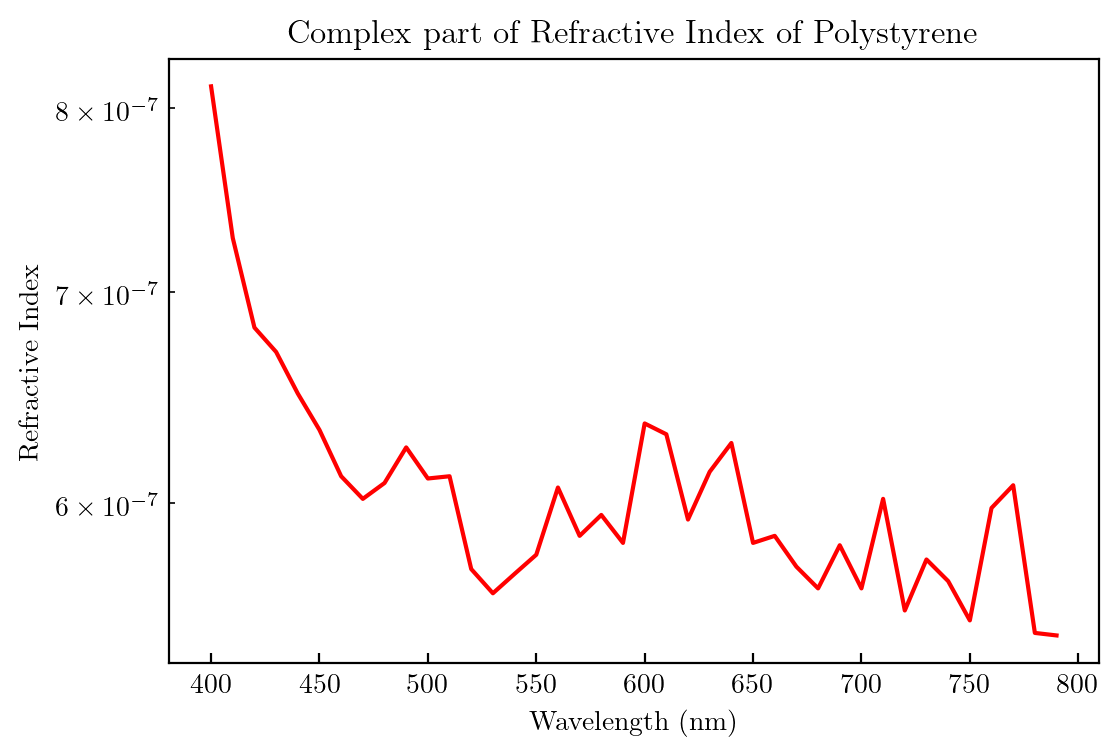

In [7]:
plt.semilogy(poly_lam*1000,poly_mim,color='red')

#plt.xlim(300,800)
#plt.ylim(-,3)

plt.xlabel('Wavelength (nm)')
plt.ylabel('Refractive Index')
#plt.text(350, 1.2, '$m_{re}$', color='blue', fontsize=14)
#plt.text(350, 2.2, '$m_{im}$', color='red', fontsize=14)

plt.title('Complex part of Refractive Index of Polystyrene')

plt.show()

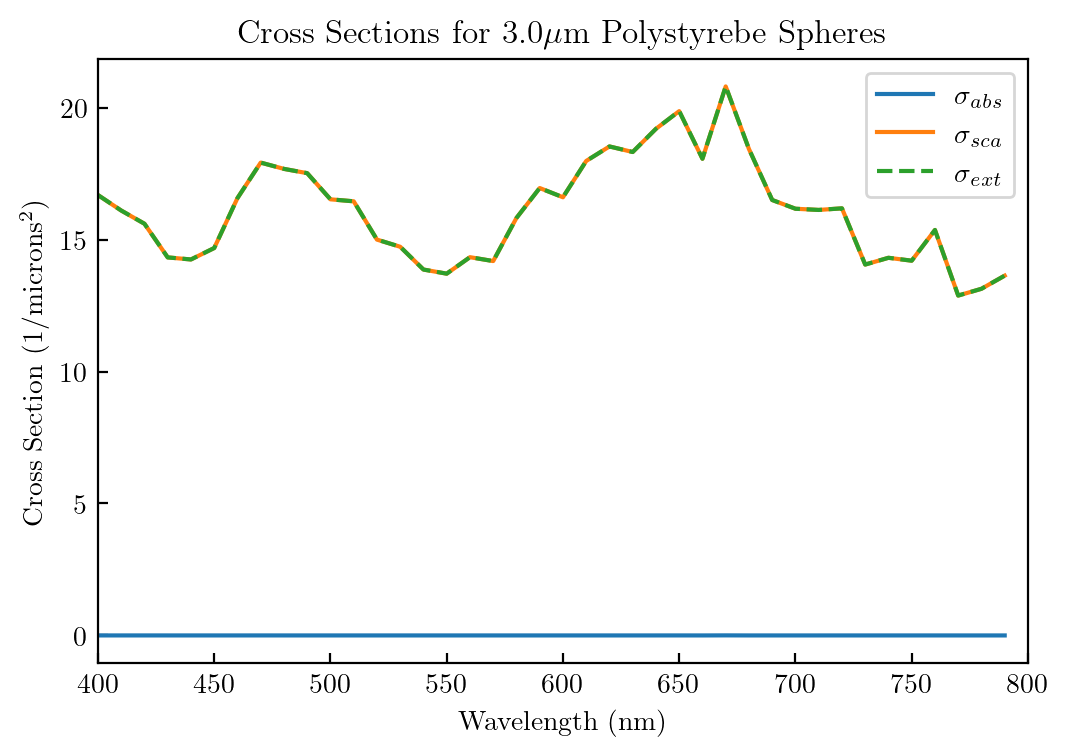

In [8]:
r = 1.5  #radius in microns

x = 2*np.pi*r/poly_lam;
m = poly_mre - 1.0j * poly_mim
qext, qsca, qback, g = mp.mie(m,x)
absorb  = (qext - qsca) * np.pi * r**2
scatt   = qsca * np.pi * r**2
extinct = qext* np.pi * r**2

plt.plot(poly_lam*1000,absorb, label="$\sigma_{abs}$")
plt.plot(poly_lam*1000,scatt, label="$\sigma_{sca}$")
plt.plot(poly_lam*1000,extinct, "--", label="$\sigma_{ext}$")
#plt.text(350, 0.35,'$\sigma_{abs}$', color='blue', fontsize=14)
#plt.text(350, 0.54,'$\sigma_{sca}$', color='red', fontsize=14)
#plt.text(350, 0.84,'$\sigma_{ext}$', color='green', fontsize=14)

plt.xlabel("Wavelength (nm)")
plt.ylabel("Cross Section (1/microns$^2$)")
plt.title("Cross Sections for %.1f$\mu$m Polystyrebe Spheres" % (r*2))

plt.xlim(400,800)
plt.legend()
plt.show()



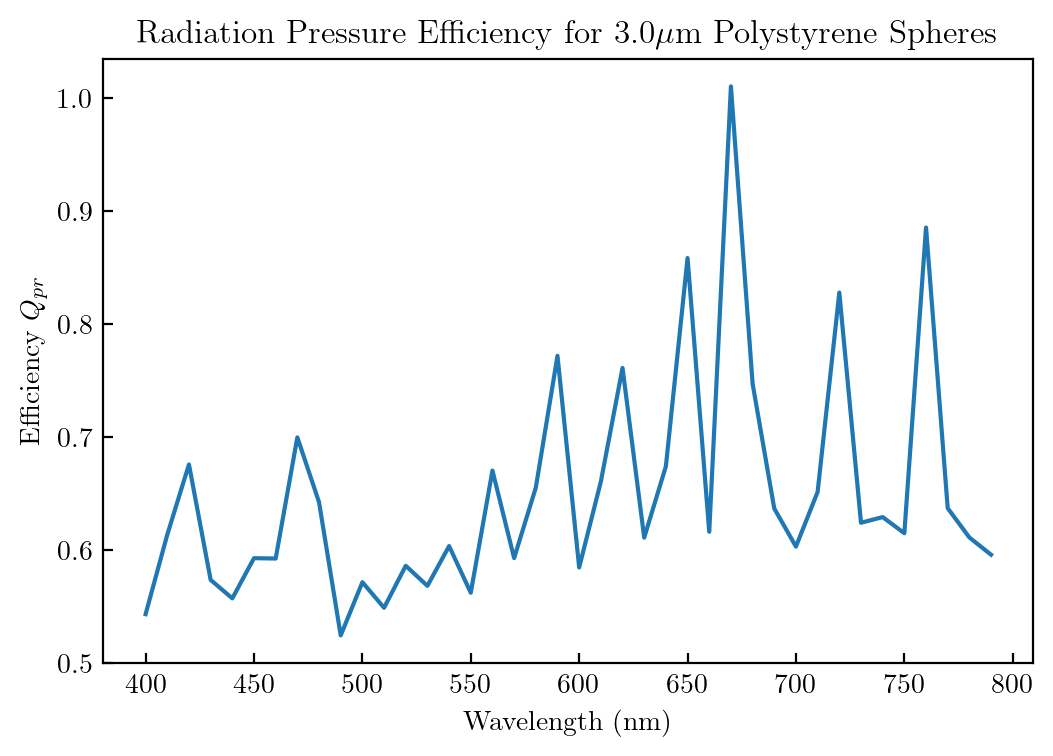

In [9]:

x = 2*np.pi*r/poly_lam;
m = poly_mre - 1.0j * poly_mim
qext, qsca, qback, g = mp.mie(m,x)
qpr  = qext - g*qsca

plt.plot(poly_lam*1000,qpr)
plt.xlabel("Wavelength (nm)")
plt.ylabel("Efficiency $Q_{pr}$")
plt.title("Radiation Pressure Efficiency for %.1f$\mu$m Polystyrene Spheres" % (r*2))

plt.show()



In [10]:
r0 = 1.5e-6
Cpr = np.pi * r0 *r0 * qpr
E0 = 4.5e-3 / (np.pi * 1.75e-3 ** 2 )
c = 299792458 / 1.33

## Radiation Pressure

The radiation pressure is given by [e.g., Kerker, p. 94]

$$
Q_{pr}=Q_{ext}-g Q_{sca}
$$

and is the momentum given to the scattering particle [van de Hulst, p. 13] in the direction of the incident wave. The radiation pressure cross section $C_{pr}$ is just the efficiency multiplied by the geometric cross section

$$
C_{pr} = \pi r^2 Q_{pr}
$$

The radiation pressure cross section $C_{pr}$ can be interpreted as the area of a black wall that would receive the same force from the same incident wave.  The actual force on the particle is
is

$$
F = E_0 \frac{C_{pr}}{c}
$$

where $E_0$ is the irradiance (W/m$^2$) on the sphere and $c$ is the velocity of the radiation in the medium


In [11]:
F = E0 * Cpr / c

Text(0, 0.5, 'Force (fN)')

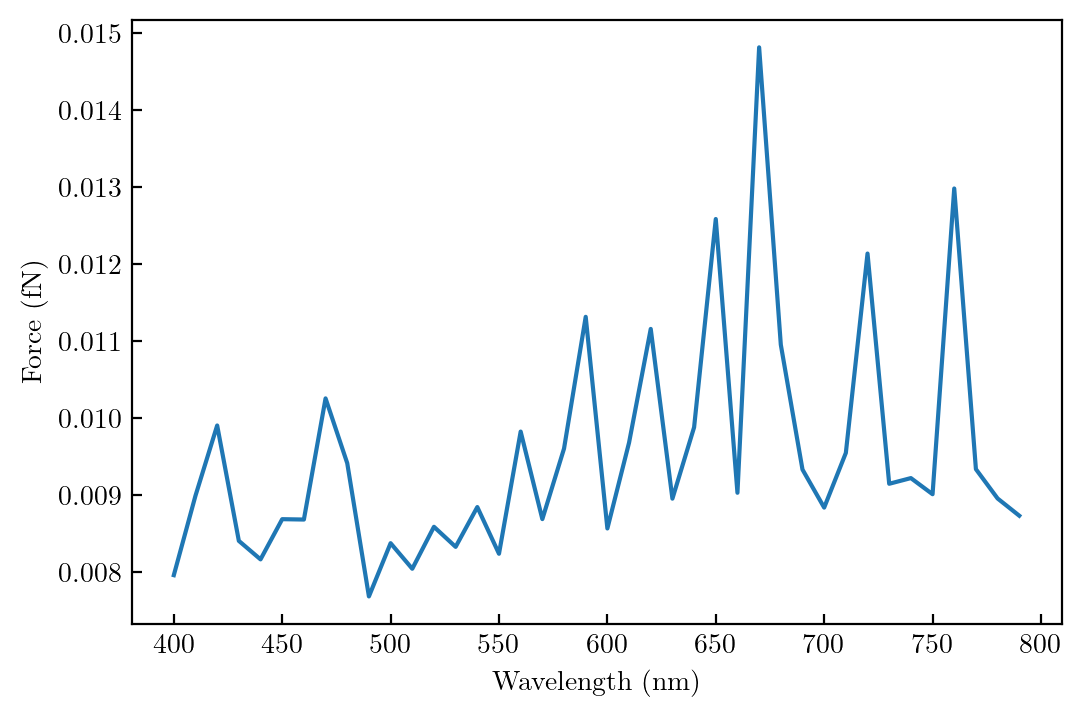

In [12]:
plt.plot(poly_lam*1000,F*1e15)
plt.xlabel("Wavelength (nm)")
plt.ylabel("Force (fN)")

In [14]:
Fs = []

rs = np.linspace(0.5, 3, 100000)
I = np.argmin(abs(poly_lam*1000 - 532))

for r in rs:
    x = 2*np.pi*r/poly_lam;
    m = poly_mre - 1.0j * poly_mim
    qext, qsca, qback, g = mp.mie(m,x)
    qpr  = qext - g*qsca
    
    r0 = r * 1e-6
    Cpr = np.pi * r0 *r0 * qpr
    E0 = 4.5e-3 / (np.pi * 1.75e-3 ** 2 )
    c = 299792458 / 1.33
    F = E0 * Cpr / c
    
    Fs.append(F[I]*1e15)
    

    


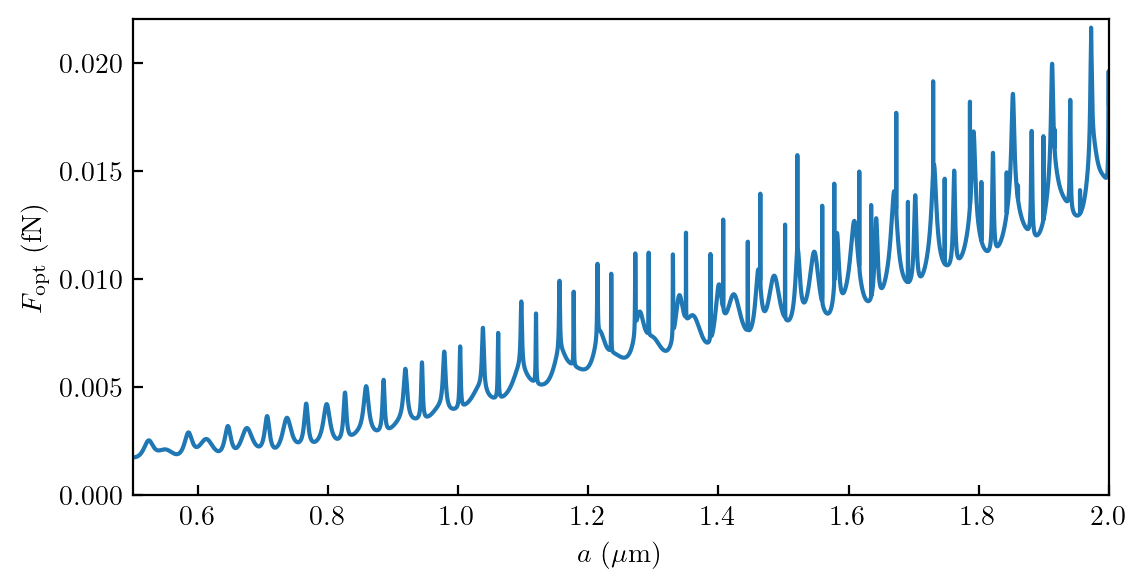

In [29]:
plt.figure(figsize=(cm2inch(16),cm2inch(8)))


plt.plot(rs, Fs)
#plt.title("Optical force for a 532 $\mu$m plane wave on Polystyrene Spheres")
plt.xlim(0.5,2)
plt.ylim(0,0.022)
plt.xlabel("$a$ ($\mu$m)")
plt.ylabel("$F_\mathrm{opt}$ (fN)")
plt.savefig("optical_force.pdf")

In [16]:
E0

467.7206490863862

In [17]:
4/3 * np.pi * (0.5e-6)**3 * (-50) * 9.81 * 1e15

-0.2568251994309656

(0.0, 0.02)

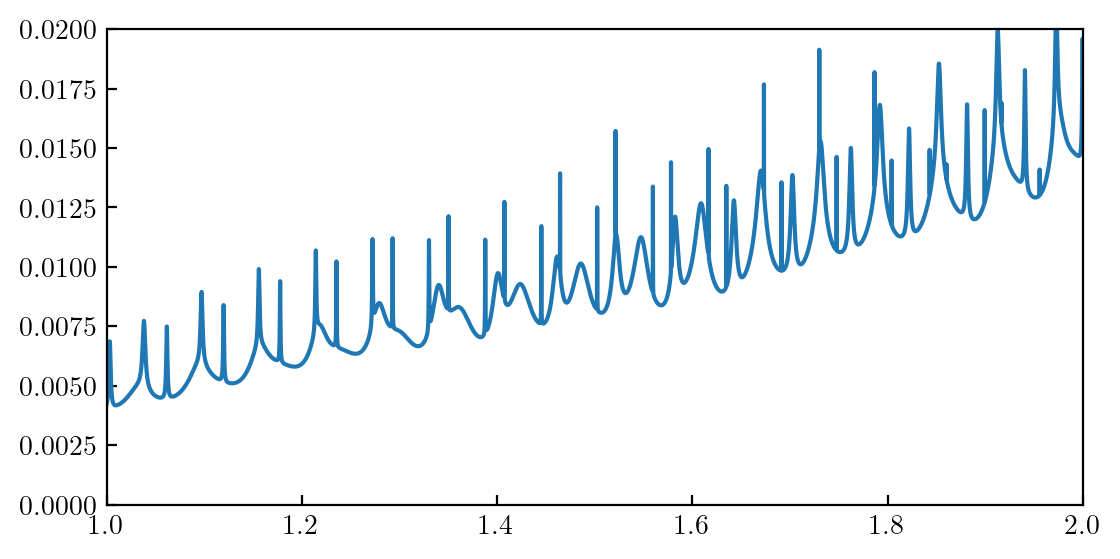

In [24]:
plt.figure(figsize=( cm2inch(16),cm2inch(8)))


plt.plot(rs, Fs)

plt.xlim(1,2)
plt.ylim(0,0.02)

(0.0, 0.02)

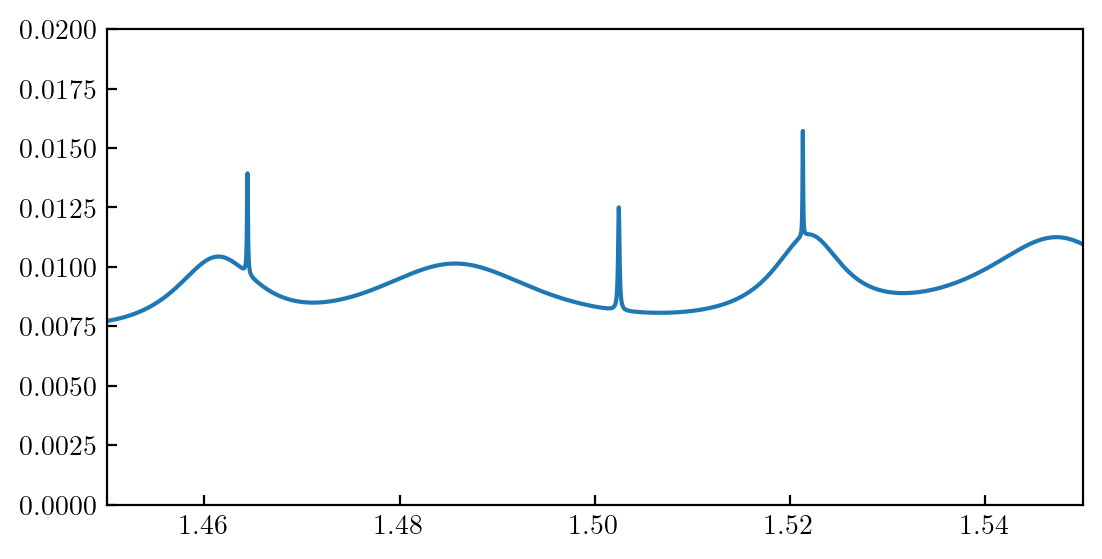

In [25]:
plt.figure(figsize=( cm2inch(16),cm2inch(8)))


plt.plot(rs, Fs)

plt.xlim(1.45,1.55)
plt.ylim(0,0.02)